# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Mini_project2/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import tensorflow as tf
# 필요하다고 판단되는 라이브러리를 추가하세요.




### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl

In [ ]:
file1 = 'data1.pkl'
df = joblib.load('data1.pkl')
df.head(1)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,month,week,year,...,temp_max_lag1,temp_min_lag1,rain(mm)_lag_1,humidity_max(%)_lag_1,humidity_min(%)_lag_1,sunshine(MJ/m2)_lag_1,season,holidays,waiting_time_MA7,boarding_rate(%)
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,...,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,New year,23.2,90.32


In [ ]:
df = joblib.load('team_data1.pkl')
df.head(1)

,Date,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,ride_percent,rc_rate,month,year,weekday,Season,holiday
0,2015-01-01,213,23.2,10764,0.0,-2.0,63.0,28.0,9.07,23.2,0.903226,4.802817,1,2015,목,Winter,1


In [ ]:
df['target'] = df['waiting_time'].shift(-1)
df.head()

,Date,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,ride_percent,rc_rate,month,year,weekday,Season,holiday,target
0,2015-01-01,213,23.2,10764,0.0,-2.0,63.0,28.0,9.07,23.200,0.903226,4.802817,1,2015,목,Winter,1,17.2
1,2015-01-02,420,17.2,8611,0.0,2.4,73.0,37.0,8.66,20.200,0.898987,7.519048,1,2015,금,Winter,0,26.2
2,2015-01-03,209,26.2,10198,0.0,8.2,89.0,58.0,5.32,22.200,0.918689,7.885167,1,2015,토,Winter,0,24.5
3,2015-01-04,196,24.5,10955,0.0,7.9,95.0,52.0,6.48,22.775,0.927096,8.397959,1,2015,일,Winter,0,26.2
4,2015-01-05,421,26.2,8663,3.4,4.1,98.0,29.0,10.47,23.460,0.877647,10.095012,1,2015,월,Winter,0,23.6


## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [ ]:
df.isna().sum()

Date                0
car_cnt             0
waiting_time        0
distance            0
rain(mm)            0
temp_max            0
humidity_max(%)     0
humidity_min(%)     0
sunshine(MJ/m2)     0
7_day_moving_avg    0
ride_percent        0
rc_rate             0
month               0
year                0
weekday             0
Season              0
holiday             0
target              1
dtype: int64

In [ ]:
df.tail()

,Date,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,ride_percent,rc_rate,month,year,weekday,Season,holiday,target
2916,2022-12-26,603,39.2,7889,0.0,3.0,86.0,51.0,10.25,43.485714,0.828983,9.212272,12,2022,월,Winter,0,44.4
2917,2022-12-27,669,44.4,8178,0.1,-0.3,92.0,40.0,10.86,42.771429,0.825909,8.423019,12,2022,화,Winter,0,44.8
2918,2022-12-28,607,44.8,7882,0.0,1.7,71.0,34.0,10.88,43.514286,0.822073,9.314662,12,2022,수,Winter,0,52.5
2919,2022-12-29,581,52.5,8433,0.0,2.1,87.0,38.0,10.84,42.957143,0.808952,9.036145,12,2022,목,Winter,0,38.3
2920,2022-12-30,600,38.3,8155,0.0,-4.4,66.0,66.0,0.00,41.042857,0.793501,8.821667,12,2022,금,Winter,0,NaN


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Date                0
car_cnt             0
waiting_time        0
distance            0
rain(mm)            0
temp_max            0
humidity_max(%)     0
humidity_min(%)     0
sunshine(MJ/m2)     0
7_day_moving_avg    0
ride_percent        0
rc_rate             0
month               0
year                0
weekday             0
Season              0
holiday             0
target              0
dtype: int64

In [ ]:
df.tail()

,Date,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,ride_percent,rc_rate,month,year,weekday,Season,holiday,target
2915,2022-12-25,217,38.7,10212,0.0,1.5,85.0,46.0,8.27,45.114286,0.816452,8.963134,12,2022,일,Winter,1,39.2
2916,2022-12-26,603,39.2,7889,0.0,3.0,86.0,51.0,10.25,43.485714,0.828983,9.212272,12,2022,월,Winter,0,44.4
2917,2022-12-27,669,44.4,8178,0.1,-0.3,92.0,40.0,10.86,42.771429,0.825909,8.423019,12,2022,화,Winter,0,44.8
2918,2022-12-28,607,44.8,7882,0.0,1.7,71.0,34.0,10.88,43.514286,0.822073,9.314662,12,2022,수,Winter,0,52.5
2919,2022-12-29,581,52.5,8433,0.0,2.1,87.0,38.0,10.84,42.957143,0.808952,9.036145,12,2022,목,Winter,0,38.3


In [ ]:
df.shape

(2920, 18)

In [ ]:
df = joblib.load('data2_1.pkl')
df.head()

,Date,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,ride_percent,rc_rate,month,year,weekday,Season,holiday,target
0,2015-01-01,213,23.2,10764,0.0,-2.0,63.0,28.0,9.07,23.200,0.903226,4.802817,1,2015,목,Winter,1,17.2
1,2015-01-02,420,17.2,8611,0.0,2.4,73.0,37.0,8.66,20.200,0.898987,7.519048,1,2015,금,Winter,0,26.2
2,2015-01-03,209,26.2,10198,0.0,8.2,89.0,58.0,5.32,22.200,0.918689,7.885167,1,2015,토,Winter,0,24.5
3,2015-01-04,196,24.5,10955,0.0,7.9,95.0,52.0,6.48,22.775,0.927096,8.397959,1,2015,일,Winter,0,26.2
4,2015-01-05,421,26.2,8663,3.4,4.1,98.0,29.0,10.47,23.460,0.877647,10.095012,1,2015,월,Winter,0,23.6


In [ ]:
df.shape

(2921, 18)

### (2) 가변수화

In [ ]:
cols = ['month',	'year',	'weekday',	'Season',	'holiday']
df = pd.get_dummies(df, columns=cols, drop_first=True)
df.head()

,Date,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,...,weekday_화,weekday_수,weekday_목,weekday_금,weekday_토,weekday_일,Season_Spring,Season_Summer,Season_Winter,holiday_1
0,2015-01-01,213,23.2,10764,0.0,-2.0,63.0,28.0,9.07,23.200,...,0,0,1,0,0,0,0,0,1,1
1,2015-01-02,420,17.2,8611,0.0,2.4,73.0,37.0,8.66,20.200,...,0,0,0,1,0,0,0,0,1,0
2,2015-01-03,209,26.2,10198,0.0,8.2,89.0,58.0,5.32,22.200,...,0,0,0,0,1,0,0,0,1,0
3,2015-01-04,196,24.5,10955,0.0,7.9,95.0,52.0,6.48,22.775,...,0,0,0,0,0,1,0,0,1,0
4,2015-01-05,421,26.2,8663,3.4,4.1,98.0,29.0,10.47,23.460,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 2920
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2921 non-null   datetime64[ns]
 1   car_cnt           2921 non-null   int64         
 2   waiting_time      2921 non-null   float64       
 3   distance          2921 non-null   int64         
 4   rain(mm)          2921 non-null   float64       
 5   temp_max          2921 non-null   float64       
 6   humidity_max(%)   2921 non-null   float64       
 7   humidity_min(%)   2921 non-null   float64       
 8   sunshine(MJ/m2)   2921 non-null   float64       
 9   7_day_moving_avg  2921 non-null   float64       
 10  ride_percent      2921 non-null   float64       
 11  rc_rate           2921 non-null   float64       
 12  target            2921 non-null   float64       
 13  month_2           2921 non-null   uint8         
 14  month_3           2921 n

### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [ ]:
val = df.loc[df['Date']>='2022-10-01']

In [ ]:
val.shape

(91, 41)

#### 1) x, y 나누기

In [ ]:
df.columns

Index(['Date', 'car_cnt', 'waiting_time', 'distance', 'rain(mm)', 'temp_max',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
       '7_day_moving_avg', 'ride_percent', 'rc_rate', 'target', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022',
       'weekday_화', 'weekday_수', 'weekday_목', 'weekday_금', 'weekday_토',
       'weekday_일', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'holiday_1'],
      dtype='object')

In [ ]:
x = df.drop(['target', 'Date','month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022'], axis=1)
y = df['target']

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=91, shuffle=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2830, 21), (91, 21), (2830,), (91,))

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [ ]:
# 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
x.head()

,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,ride_percent,...,weekday_화,weekday_수,weekday_목,weekday_금,weekday_토,weekday_일,Season_Spring,Season_Summer,Season_Winter,holiday_1
0,213,23.2,10764,0.0,-2.0,63.0,28.0,9.07,23.200,0.903226,...,0,0,1,0,0,0,0,0,1,1
1,420,17.2,8611,0.0,2.4,73.0,37.0,8.66,20.200,0.898987,...,0,0,0,1,0,0,0,0,1,0
2,209,26.2,10198,0.0,8.2,89.0,58.0,5.32,22.200,0.918689,...,0,0,0,0,1,0,0,0,1,0
3,196,24.5,10955,0.0,7.9,95.0,52.0,6.48,22.775,0.927096,...,0,0,0,0,0,1,0,0,1,0
4,421,26.2,8663,3.4,4.1,98.0,29.0,10.47,23.460,0.877647,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.head()

,Date,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,...,weekday_화,weekday_수,weekday_목,weekday_금,weekday_토,weekday_일,Season_Spring,Season_Summer,Season_Winter,holiday_1
0,2015-01-01,213,23.2,10764,0.0,-2.0,63.0,28.0,9.07,23.200,...,0,0,1,0,0,0,0,0,1,1
1,2015-01-02,420,17.2,8611,0.0,2.4,73.0,37.0,8.66,20.200,...,0,0,0,1,0,0,0,0,1,0
2,2015-01-03,209,26.2,10198,0.0,8.2,89.0,58.0,5.32,22.200,...,0,0,0,0,1,0,0,0,1,0
3,2015-01-04,196,24.5,10955,0.0,7.9,95.0,52.0,6.48,22.775,...,0,0,0,0,0,1,0,0,1,0
4,2015-01-05,421,26.2,8663,3.4,4.1,98.0,29.0,10.47,23.460,...,0,0,0,0,0,0,0,0,1,0


### (1) 머신러닝

#### 1) 모델1

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
print('MAE :',mean_absolute_error(y_test, y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))

MAE : 4.38966057992302
MAPE : 0.10874947988818794
R2 : 0.03978542276839547


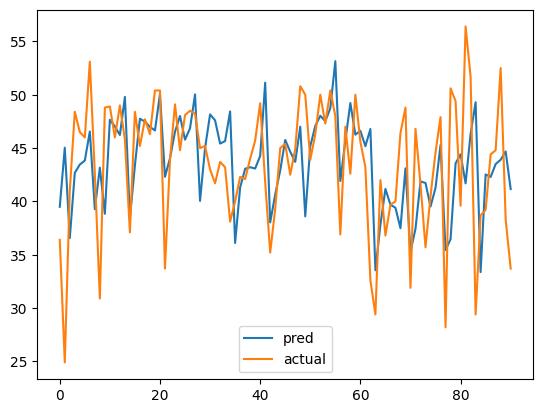

In [ ]:
plt.plot(y_pred, label='pred')
plt.plot(y_test.values, label='actual')
plt.legend()
plt.show()

#### 2) 모델2

In [ ]:
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE :',mean_absolute_error(y_test, y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))

MAE : 4.846797867659683
MAPE : 0.11786836203179095
R2 : -0.09189744653241205


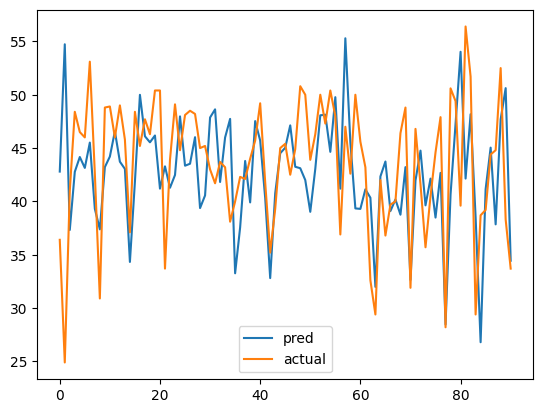

In [ ]:
plt.plot(y_pred, label='pred')
plt.plot(y_test.values, label='actual')
plt.legend()
plt.show()

In [ ]:
param = {
    'max_depth': [3, 4, 5],
    'max_leaves': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 2, 4],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
}

model_xgb = XGBRegressor()
model = GridSearchCV(model_xgb, param, scoring='neg_mean_absolute_error')

#model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE :',mean_absolute_error(y_test, y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))

MAE : 4.363480679019467
MAPE : 0.10670981355859324
R2 : 0.12732992485061845


#### 3) 모델3

In [ ]:
param_grid = {
    'n_estimators': [1000],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10],
}

In [ ]:
model_rf = RandomForestRegressor()
model = GridSearchCV(model_rf, param_grid, scoring='neg_mean_squared_error')

In [ ]:
#model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE :',mean_absolute_error(y_test, y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAE : 4.4907000511418715
MAPE : 0.10998153058921094


In [ ]:
help(RandomForestRegressor)

#### 4) 모델4

In [ ]:
model = LGBMRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE :',mean_absolute_error(y_test, y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2330
[LightGBM] [Info] Number of data points in the train set: 2830, number of used features: 21
[LightGBM] [Info] Start training from score 40.208127
MAE : 4.61679856580689
MAPE : 0.11304674976325231
R2 : -0.12297805307209653


### (2) 딥러닝

In [ ]:
import tensorflow as tf

In [ ]:
X = tf.keras.Input(shape=[21])
H = tf.keras.layers.Dense(64, activation='swish')(X)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.Model(X,Y)
model.compile(loss='mse')

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_37 (Dense)            (None, 64)                1408      
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1473 (5.75 KB)
Trainable params: 1473 (5.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early = tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights= True, monitor='val_loss', min_delta=0) # monitor='val_loss', min_delta=0 : 디폴트 값
model.fit(x_train, y_train, epochs=1000, batch_size=128, validation_split=0.1)

In [ ]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 14ms/step - loss: 253.4273


253.4273223876953

In [ ]:
y_pred = model.predict(x_test)
print('MAE :',mean_absolute_error(y_test, y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))

3/3 [==============================] - 0s 4ms/step
MAE : 9.840196814903845
MAPE : 0.21942607910016984
R2 : -2.306955294035706


#### 1) 모델1

In [ ]:
df2 = joblib.load('data2_1.pkl')
df2.head()

,Date,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,ride_percent,rc_rate,month,year,weekday,Season,holiday,target
0,2015-01-01,213,23.2,10764,0.0,-2.0,63.0,28.0,9.07,23.200,0.903226,4.802817,1,2015,목,Winter,1,17.2
1,2015-01-02,420,17.2,8611,0.0,2.4,73.0,37.0,8.66,20.200,0.898987,7.519048,1,2015,금,Winter,0,26.2
2,2015-01-03,209,26.2,10198,0.0,8.2,89.0,58.0,5.32,22.200,0.918689,7.885167,1,2015,토,Winter,0,24.5
3,2015-01-04,196,24.5,10955,0.0,7.9,95.0,52.0,6.48,22.775,0.927096,8.397959,1,2015,일,Winter,0,26.2
4,2015-01-05,421,26.2,8663,3.4,4.1,98.0,29.0,10.47,23.460,0.877647,10.095012,1,2015,월,Winter,0,23.6


In [ ]:
cols = ['month','year','weekday','Season','holiday']
df2 = pd.get_dummies(df2, columns=cols, drop_first=True)
df2.head()

,Date,car_cnt,waiting_time,distance,rain(mm),temp_max,humidity_max(%),humidity_min(%),sunshine(MJ/m2),7_day_moving_avg,...,weekday_화,weekday_수,weekday_목,weekday_금,weekday_토,weekday_일,Season_Spring,Season_Summer,Season_Winter,holiday_1
0,2015-01-01,213,23.2,10764,0.0,-2.0,63.0,28.0,9.07,23.200,...,0,0,1,0,0,0,0,0,1,1
1,2015-01-02,420,17.2,8611,0.0,2.4,73.0,37.0,8.66,20.200,...,0,0,0,1,0,0,0,0,1,0
2,2015-01-03,209,26.2,10198,0.0,8.2,89.0,58.0,5.32,22.200,...,0,0,0,0,1,0,0,0,1,0
3,2015-01-04,196,24.5,10955,0.0,7.9,95.0,52.0,6.48,22.775,...,0,0,0,0,0,1,0,0,1,0
4,2015-01-05,421,26.2,8663,3.4,4.1,98.0,29.0,10.47,23.460,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# x = df2.drop(['target', 'Date','month_2',
#        'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
#        'month_9', 'month_10', 'month_11', 'month_12', 'year_2016', 'year_2017',
#        'year_2018', 'year_2019', 'year_2020', 'year_2021', 'year_2022'], axis=1)
x = df2.drop(['target','Date'], axis=1)
y = df2['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=91, shuffle=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2830, 39), (91, 39), (2830,), (91,))

In [ ]:
x_train.shape

(2830, 40)

In [ ]:
X = tf.keras.Input(shape=[39])
#H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dropout(0.5)(X)
H = tf.keras.layers.Dense(256)(H)
H = tf.keras.layers.BatchNormalization()(H) # 현재까진 여기에 BatchNormalization을 사용하는게 제일 좋다는 결론
H = tf.keras.layers.Activation('swish')(H)

# H = tf.keras.layers.Dropout(0.5)(H)
# H = tf.keras.layers.Dense(512)(H)
# H = tf.keras.layers.BatchNormalization()(H)
# H = tf.keras.layers.Activation('swish')(H)

# H = tf.keras.layers.Dropout(0.5)(H)
# H = tf.keras.layers.Dense(256)(H)
# H = tf.keras.layers.BatchNormalization()(H)
# H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dropout(0.5)(H)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.Model(X, Y)
model.compile(optimizer=optimizer, loss='mse')

model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 39)]              0         
                                                                 
 dropout_18 (Dropout)        (None, 39)                0         
                                                                 
 dense_20 (Dense)            (None, 256)               10240     
                                                                 
 batch_normalization_14 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                           

In [ ]:
from keras.optimizers import Adam

# 학습률을 지정하여 Adam 옵티마이저를 생성
optimizer = Adam(learning_rate=0.001)

In [ ]:
# 모델 학습
#early = tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights= True, monitor='val_loss', min_delta=0) # monitor='val_loss', min_delta=0 : 디폴트 값
model.fit(x_train, y_train, epochs=500, batch_size=128, verbose=0)
model.fit(x_train, y_train, epochs=10, batch_size=128)
y_pred = model.predict(x_test)
print('MAE :',mean_absolute_error(y_test, y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

Epoch 1/10
23/23 [==============================] - 0s 4ms/step - loss: 113.4172
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 110.5908
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 104.6695
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 114.3366
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 109.0828
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 105.0002
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 112.6696
Epoch 8/10
23/23 [==============================] - 0s 4ms/step - loss: 107.6775
Epoch 9/10
23/23 [==============================] - 0s 3ms/step - loss: 107.9074
Epoch 10/10
3/3 [==============================] - 0s 3ms/step
MAE : 14.768437630789618
MAPE : 0.3265606515887143


In [ ]:
y_pred = model.predict(x_test)
print('MAE :',mean_absolute_error(y_test, y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

3/3 [==============================] - 0s 3ms/step
MAE : 16.26706902221009
MAPE : 0.360410226013432


#### 2) 모델2

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall

In [ ]:
# 모델을 준비합니다.
X = tf.keras.Input(shape=[39])

H = tf.keras.layers.BatchNormalization()(X)
H = tf.keras.layers.Dense(256, activation="swish")(H)
H = tf.keras.layers.Dropout(0.5)(H)

H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dense(128, activation="swish")(H)
H = tf.keras.layers.Dropout(0.5)(H)

H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dense(64, activation="swish")(H)
H = tf.keras.layers.Dropout(0.5)(H)

Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.Model(X, Y)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='mae')
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 39)]              0         
                                                                 
 batch_normalization_15 (Ba  (None, 39)                156       
 tchNormalization)                                               
                                                                 
 dense_22 (Dense)            (None, 256)               10240     
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_16 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_23 (Dense)            (None, 128)               3289

Epoch 1/10
12/12 [==============================] - 4s 8ms/step - loss: 40.1620
Epoch 2/10
12/12 [==============================] - 0s 8ms/step - loss: 39.7477
Epoch 3/10
12/12 [==============================] - 0s 8ms/step - loss: 39.2576
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 38.7999
Epoch 5/10
12/12 [==============================] - 0s 7ms/step - loss: 38.1457
Epoch 6/10
12/12 [==============================] - 0s 8ms/step - loss: 37.4398
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 36.6154
Epoch 8/10
12/12 [==============================] - 0s 5ms/step - loss: 35.6104
Epoch 9/10
12/12 [==============================] - 0s 5ms/step - loss: 34.4722
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
MSE: 1645.77524
R2: -43.28311
MAE: 40.01886
MAPE: 0.91617


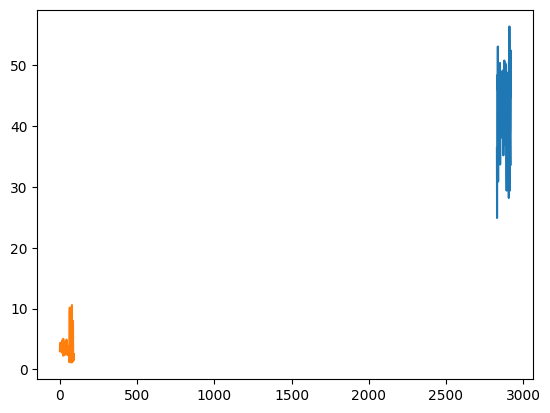

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=256, )
pred_dl = model.predict(x_test)
pred_dl = [v[0] for v in pred_dl]
y_pred = pd.Series(pred_dl)
print("MSE:", round(mse(y_test, y_pred), 5))
print("R2:", round(r2_score(y_test, y_pred), 5))
print("MAE:", round(mae(y_test, y_pred), 5))
print("MAPE:", round(mape(y_test, y_pred), 5))
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [ ]:
df = joblib.load('l_data.pkl')
df.head()

In [ ]:
cols = ['month',	'year',	'weekday',	'Season',	'holiday']
df = pd.get_dummies(df, columns=cols, drop_first=True)
df.head()

In [ ]:
model = joblib.load('395_0946.joblib')